In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [28]:
def get_unique_values_with_counts(dataframe, column_name):
    """
    This function returns a dictionary with unique values in a specified column of a dataframe
    and their corresponding counts.
    
    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to extract unique values and counts from.
    
    Returns:
    dict: A dictionary where keys are unique values and values are their counts.
    """
    value_counts = dataframe[column_name].value_counts()
    return value_counts.to_dict()

# Function to find keywords in specified columns
def find_keywords(row, columns, keywords):
    found_keywords = []
    for column in columns:
        for keyword in keywords:
            if pd.notna(row[column]) and keyword in row[column]:
                found_keywords.append(keyword)
    return found_keywords


In [29]:
df = pd.read_csv('ibm_data.csv')

In [30]:
df = df[df['project_status_name'] == 'In-Progress']

df.to_csv('ibm_in_progress.csv', index=False)

df.shape

(2158, 15)

In [31]:
get_unique_values_with_counts(df, 'failure')


{False: 1569, True: 589}

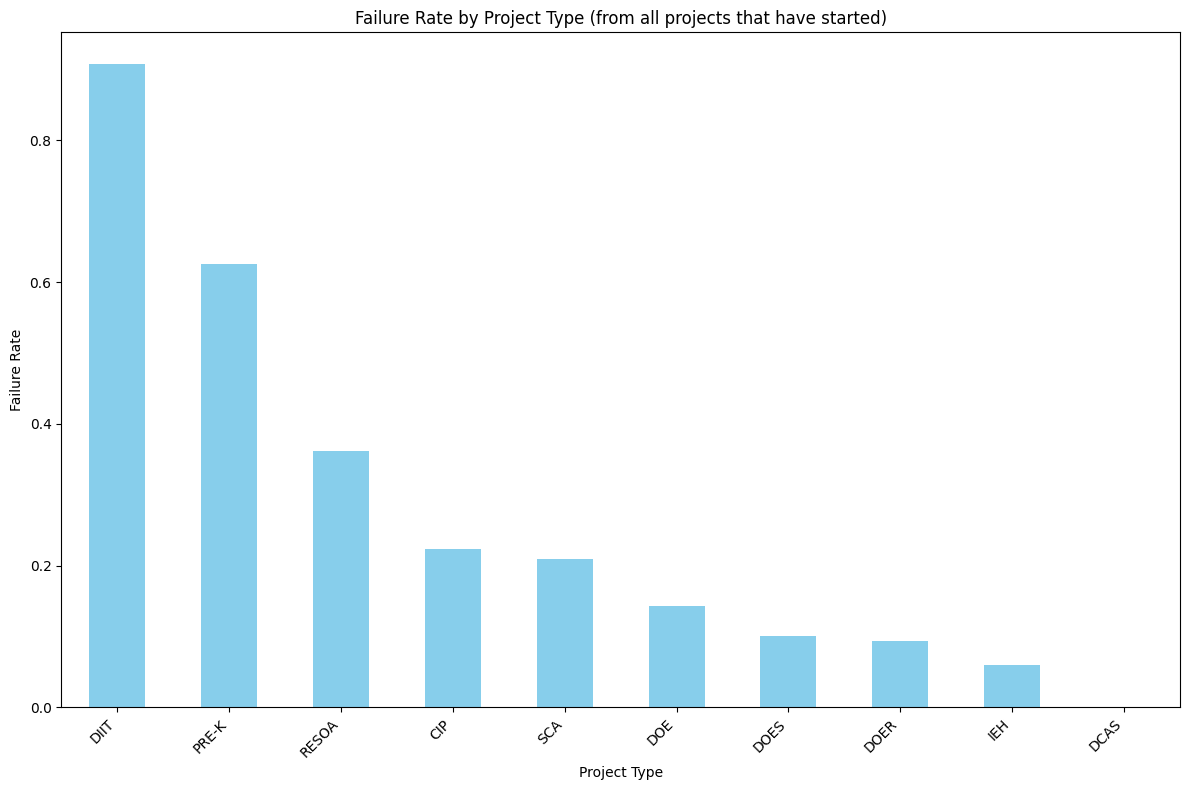

In [32]:
# List of keywords to keep
project_types = [
    "SCA", "CIP", "DIIT", "DOE", "DOES", "DOER",
    "RESOA", "IEH", "PRE-K", "DCAS", "FY", "FAST TRACK PROJECTS"
]

df_PNS = df.map(lambda x: x.replace('PREK', 'PRE-K') if isinstance(x, str) else x)

# Columns to check for project types
columns_to_check = ['project_type', 'project_phase_planned_end_date']

# Apply the function to each row
df['project_type_split'] = df.apply(lambda row: find_keywords(row, columns_to_check, project_types), axis=1)

# Explode the list into separate rows
df_exploded = df.explode('project_type_split')

# Filter out rows where 'project_type_split' is NaN
df_exploded = df_exploded[df_exploded['project_type_split'].notna()]

# Calculate the failure rate for each project type
failure_rate = df_exploded.groupby('project_type_split')['failure'].mean()

# Sort the failure rate
failure_rate = failure_rate.sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12, 8))
failure_rate.plot(kind='bar', color='skyblue')
plt.title('Failure Rate by Project Type (from all projects that have started)')
plt.xlabel('Project Type')
plt.ylabel('Failure Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()